<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning/blob/main/curve_fit%20function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**curve_fit**
Using 'curve_fit' we can build a model based on the functions we wrote.

For example, the above data can be more accurately predicted using the Logistic regression function:

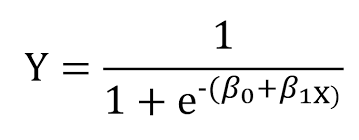

theta_0=-688.5219305283639
theta_1=690.45027008789
MAE for original data: 0.030495058181701222


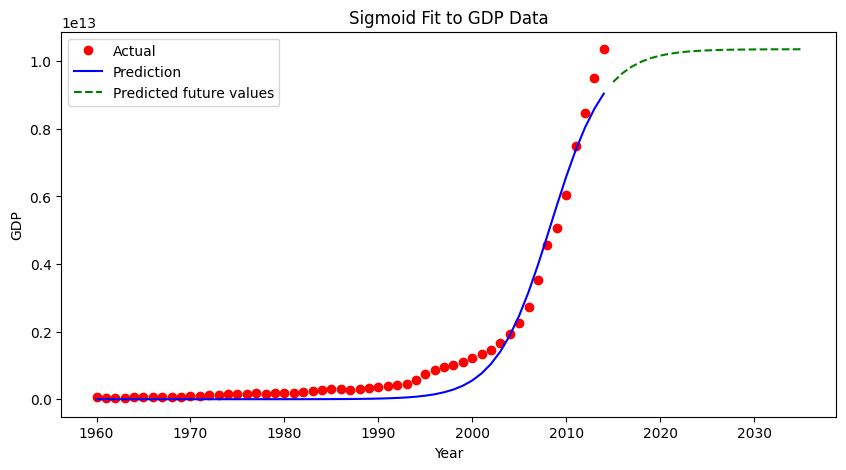

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy.optimize import curve_fit

# Load and normalize data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv")
x = df['Year'].values / df['Year'].max()
y = df['Value'].values / df['Value'].max()

# Define the logistic regression sigmoid function
def logistic_regression_sigmoid(x, beta_0, beta_1):
    return 1 / (1 + np.exp(-(beta_0 + beta_1 * x)))

# Fit the model
beta, _ = curve_fit(logistic_regression_sigmoid, x, y)
print(f"theta_0={beta[0]}")
print(f"theta_1={beta[1]}")

# Predict values
prediction = logistic_regression_sigmoid(x, *beta)

# Predict new values
new_years = np.arange(2015, 2036)
new_years_normalized = new_years / df['Year'].max()
predicted = logistic_regression_sigmoid(new_years_normalized, *beta)

# Calculate MAE for the original dataset
mae1 = mean_absolute_error(y, prediction)
print("MAE for original data:", mae1)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x * df['Year'].max(), y * df['Value'].max(), 'ro', label='Actual')
plt.plot(x * df['Year'].max(), prediction * df['Value'].max(), 'b', label='Prediction')
plt.plot(new_years, predicted * df['Value'].max(), 'g--', label='Predicted future values')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('Sigmoid Fit to GDP Data')
plt.show()


###**Custom Sigmoid Function & Logistic Regression Sigmoid Function:**

Custom Sigmoid Parameters: Beta_1=690.4517092123388, Beta_2=0.9972071272529931
Logistic Regression Parameters: Beta_0=-688.5219305283639, Beta_1=690.45027008789
MAE for Custom Sigmoid: 0.030495070460810958
MAE for Logistic Regression Sigmoid: 0.030495058181701222


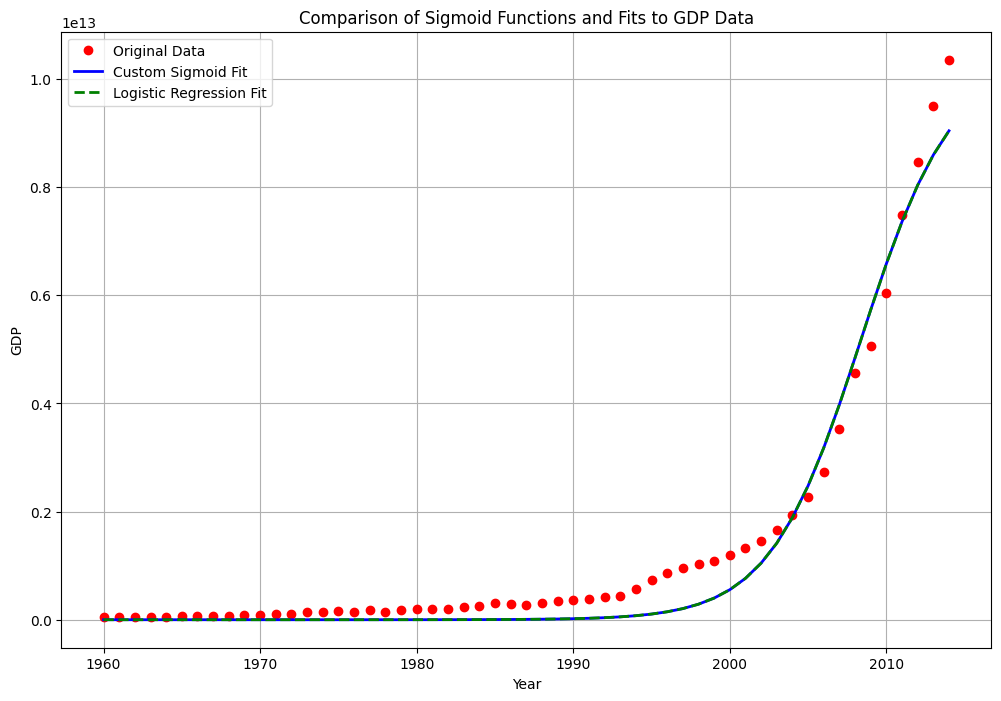

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df = pd.read_csv(url)

# Prepare and normalize data
x_data = df["Year"].values
y_data = df["Value"].values
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

# Custom sigmoid function
def custom_sigmoid(x, Beta_1, Beta_2):
    return 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))

# Logistic regression sigmoid function
def logistic_regression_sigmoid(x, Beta_0, Beta_1):
    return 1 / (1 + np.exp(-(Beta_0 + Beta_1 * x)))

# Fit the custom sigmoid function to the data
beta_custom, _ = curve_fit(custom_sigmoid, xdata, ydata)
print(f"Custom Sigmoid Parameters: Beta_1={beta_custom[0]}, Beta_2={beta_custom[1]}")

# Fit the logistic regression sigmoid function to the data
beta_logistic, _ = curve_fit(logistic_regression_sigmoid, xdata, ydata)
print(f"Logistic Regression Parameters: Beta_0={beta_logistic[0]}, Beta_1={beta_logistic[1]}")

# Predictions using custom sigmoid function
yhat_custom = custom_sigmoid(xdata, *beta_custom)

# Predictions using logistic regression sigmoid function
yhat_logistic = logistic_regression_sigmoid(xdata, *beta_logistic)

# Calculate Mean Absolute Error for both models
mae_custom = mean_absolute_error(ydata, yhat_custom)
mae_logistic = mean_absolute_error(ydata, yhat_logistic)
print(f"MAE for Custom Sigmoid: {mae_custom}")
print(f"MAE for Logistic Regression Sigmoid: {mae_logistic}")

# Plot the data and fits
plt.figure(figsize=(12, 8))
plt.plot(x_data, y_data, 'ro', label='Original Data')

# Plot fits for custom sigmoid function
plt.plot(x_data, custom_sigmoid(xdata, *beta_custom) * max(y_data), 'b-', linewidth=2, label='Custom Sigmoid Fit')

# Plot fits for logistic regression sigmoid function
plt.plot(x_data, logistic_regression_sigmoid(xdata, *beta_logistic) * max(y_data), 'g--', linewidth=2, label='Logistic Regression Fit')

plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Comparison of Sigmoid Functions and Fits to GDP Data')
plt.grid(True)
plt.show()



Some questions related to codes above:
### 1. Why Use `.values` in `x_data` and `y_data`?

In this code:

```python
x_data = df["Year"].values
y_data = df["Value"].values
```

- **`.values`**: This attribute extracts the underlying NumPy array from the Pandas DataFrame or Series. It essentially converts the Pandas Series into a NumPy array, which is more suitable for mathematical operations and optimization functions.

**Why `.values`?**

- **Compatibility with Libraries**: Functions from libraries like `scipy.optimize.curve_fit` often expect NumPy arrays as input. Using `.values` ensures that the data is in the correct format for these functions.
- **Optimization Functions**: Optimization and fitting functions generally work with raw numerical data rather than Pandas objects. They require the data to be in a numerical array format.

In contrast, when you use `x = df[['Year']]` in linear regression, you're working with a DataFrame that can include multiple features and is suitable for scikit-learn's methods, which handle the underlying data extraction internally. But for optimization or manual calculations, raw arrays are often more practical.

### 2. What is `_` in `beta_custom, _`?

In:

```python
beta_custom, _ = curve_fit(custom_sigmoid, xdata, ydata)
```

- **`_`**: This is a conventional placeholder for a variable that we don't need. In this case, `curve_fit` returns two values:
  - `beta_custom`: The optimized parameters for the sigmoid function.
  - `_` (ignored): The covariance matrix of the parameter estimates.

**Why is `_` used?**

- **Ignoring Unused Values**: Since we only need the optimized parameters (`beta_custom`) and not the covariance matrix, you use `_` to indicate that we're intentionally ignoring the second value. This is a common Python convention for "don't care" variables.

### 3. What is `(xdata, *beta_custom)` and Why Use `*`?

In:

```python
yhat_custom = custom_sigmoid(xdata, *beta_custom)
```

- **`*` (Unpacking Operator)**: This operator is used to unpack a list or tuple into positional arguments for a function.

**What’s happening here?**

- **Function Call with Unpacked Arguments**: `beta_custom` is a tuple or list of parameters (e.g., `[Beta_1, Beta_2]`). When we use `*beta_custom`, we're unpacking this list so that each element of the list is passed as a separate argument to `custom_sigmoid`.

For example, if `beta_custom = [1.2, 0.5]`, then `custom_sigmoid(xdata, *beta_custom)` is equivalent to `custom_sigmoid(xdata, 1.2, 0.5)`.

**Why use `*`?**

- **Matching Function Parameters**: The `custom_sigmoid` function is defined to accept multiple parameters (`Beta_1` and `Beta_2`). The `*` operator allows we to pass these parameters directly from a list or tuple, aligning with the function's expected arguments.

**Can we calculate MAE for the predicted values on the new years and actual future values?**

No. We don't have actual future values, so calculating MAE for predictions on new years isn't meaningful in this context.

MAE Calculation:

-Purpose: Mean Absolute Error (MAE) is used to measure the accuracy of predictions by comparing them to actual observed values.
Use Case: It’s used to evaluate how well a model has been trained on historical data by comparing the model’s predictions to the actual known values in the test set or training set.
Training and Testing Data:

-Training Data: MAE helps in understanding how well the model has learned the training data.
Testing Data: MAE is also used on a separate test set to evaluate the model’s performance on unseen data.
Real-Life Predictions:

-Future Predictions: When making future predictions, we don’t have actual values to compare against.
MAE Limitation: Because there are no actual future values available, calculating MAE for future predictions isn’t meaningful. MAE requires both predicted values and their corresponding actual values to assess accuracy.
### Summary

1. **`.values`** is used to convert Pandas Series to NumPy arrays for compatibility with numerical methods.
2. **`_`** is a placeholder for an unused return value.
3. **`*`** unpacks a list or tuple into separate arguments for a function call.
4.   In real-life scenarios, when predicting future values, we can’t calculate MAE as there are no actual future values for comparison.

Each of these elements helps in preparing data and calling functions appropriately for fitting and optimization tasks.
